In [1]:
import pandas as pd
import networkx as nx

In [2]:
df = pd.read_csv('news.csv')

In [3]:
df.rename(columns={'Unnamed: 0': 'ID', 'class': 'label'}, inplace=True)
df.drop(['date'], axis=1, inplace=True)

In [4]:
df.columns

Index(['ID', 'news', 'subject', 'month', 'day', 'year', 'label'], dtype='object')

In [5]:
sample = df[0:50]

In [6]:
sample.columns

Index(['ID', 'news', 'subject', 'month', 'day', 'year', 'label'], dtype='object')

In [7]:
sample

,ID,news,subject,month,day,year,label
0,0,white house presses congress on bill allowing ...,politics,9,21,2016,1
1,1,china urges cooperation after us brands it a c...,politics,12,19,2017,1
2,2,cleveland school officer placed on leave afte...,politics,1,8,2016,0
3,3,syrian democratic forces say reach deir alzor ...,politics,9,10,2017,1
4,4,senator talks all night as democrats fight tru...,politics,4,5,2017,1
5,5,san francisco just told trump in no uncertain...,politics,12,3,2016,0
6,6,this is clinton’s supreme court plan and it c...,politics,3,28,2016,0
7,7,uk's johnson raises hackles over ww2 'punishme...,politics,1,18,2017,1
8,8,senate blocks democratic plan to expand gun ba...,politics,6,20,2016,1
9,9,mike rowe a lesson on liberty that everyone sh...,politics,7,4,2016,0


In [8]:
sample['label'].value_counts()

label
1    28
0    22
Name: count, dtype: int64

In [9]:
graph = nx.Graph()

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english")
tfidf_features = tfidf_vectorizer.fit_transform(sample['news'])

for idx, row in sample.iterrows():
    feature_tfidf_scores = tfidf_features[idx].toarray()[0]
    
    # Pair feature indices with their TF-IDF scores
    features_with_scores = list(enumerate(feature_tfidf_scores))
    
    # Sort the features based on their TF-IDF scores in descending order
    top_features = sorted(features_with_scores, key=lambda x: x[1], reverse=True)
    
    # Select the top 100 most prominent features
    necessary_features = top_features[:200]
    
    node_attrs = {
        'content': necessary_features,
        'month': row['month'],
        'day': row['day'],
        'year': row['year'],
    }
    graph.add_node(row['ID'], label=row['label'], **node_attrs)

In [11]:
for node, attrs in graph.nodes(data=True):
    print(f"Node {node}:")
    for attr_name, attr_value in attrs.items():
        print(f"{attr_name} : {attr_value}")

Node 0:
label : 1
content : [(4353, 0.32049218887911557), (1398, 0.24036914165933665), (980, 0.23742463348459217), (2045, 0.23126855153717768), (4465, 0.18501484122974216), (391, 0.16024609443955778), (3158, 0.16024609443955778), (3600, 0.16024609443955778), (2047, 0.1449172128697211), (2150, 0.1449172128697211), (3971, 0.1449172128697211), (3584, 0.14384272329010772), (2830, 0.1387611309223066), (2598, 0.1256051060251096), (1612, 0.11871231674229608), (2856, 0.11871231674229608), (3693, 0.11871231674229608), (4543, 0.10783630218470776), (2608, 0.1033834351724594), (3679, 0.09250742061487108), (3154, 0.09071213128019688), (5, 0.08012304721977889), (60, 0.08012304721977889), (145, 0.08012304721977889), (364, 0.08012304721977889), (1124, 0.08012304721977889), (1248, 0.08012304721977889), (1421, 0.08012304721977889), (1466, 0.08012304721977889), (2293, 0.08012304721977889), (2299, 0.08012304721977889), (2423, 0.08012304721977889), (2536, 0.08012304721977889), (2919, 0.08012304721977889), 

In [12]:
print(tfidf_features[6][0, 2129])

0.08344776063959557


In [13]:
for node, attrs in graph.nodes(data=True):
    if 'label' not in attrs:
        print(f"Node {node}")# Edges between same and different categories

In [14]:
from sklearn.metrics.pairwise import cosine_similarity

In [15]:
import matplotlib.pyplot as plt

In [16]:
graph_same = graph
graph_same_different = graph

In [17]:
#print(graph_same.nodes[sample.iloc[23]['ID']]['content'])
print(cosine_similarity(graph_same.nodes[sample.iloc[3]['ID']]['content'], graph_same.nodes[sample.iloc[1]['ID']]['content'])[0][0])
print(cosine_similarity(tfidf_features[3], tfidf_features[1])[0][0])

0.9999999098050724
0.006974131200762501


In [18]:
import numpy as np

# Edges between same categories only

In [32]:
from sklearn.metrics.pairwise import cosine_similarity
total=0
graph_same.remove_edges_from(list(graph_same.edges()))
for i in range(len(sample)):
    print("\nFor node ", i, ":\n")
    n=1
    for j in range(i+1, len(sample)):
        # Check if the categories of nodes i and j are the same
        if sample.iloc[i]['label'] == sample.iloc[j]['label']:
            # Access TF-IDF vectors of nodes i and j from the graph
            tfidf_vector_i = graph_same.nodes[sample.iloc[i]['ID']]['content']
            tfidf_vector_j = graph_same.nodes[sample.iloc[j]['ID']]['content']

            tfidf_vector_i_flat = np.array(tfidf_vector_i).ravel()
            tfidf_vector_j_flat = np.array(tfidf_vector_j).ravel()
            
            # Calculate cosine similarity between TF-IDF vectors of nodes i and j
            similarity_score = cosine_similarity([tfidf_vector_i_flat], [tfidf_vector_j_flat])[0][0]

            
            # Define a threshold to create edges only for pairs with similarity above a certain threshold
            threshold = 0.8
            if similarity_score > threshold:
                print(n, " ", j, " ", similarity_score)
                n=n+1
                total=total+1
                # Add an edge between nodes i and j with the similarity score as an edge attribute
                graph_same.add_edge(sample.iloc[i]['ID'], sample.iloc[j]['ID'], weight=similarity_score)
print("Total: ", total)



For node  0 :


For node  1 :

1   7   0.8302628142183726

For node  2 :

1   6   0.8167867755954308

For node  3 :


For node  4 :

1   24   0.8991561554122307
2   30   0.8160979682508727
3   36   0.8745951606882773
4   41   0.8437570301666453

For node  5 :

1   15   0.8287769736947356
2   16   0.8634999220553423
3   29   0.8052113983750905
4   40   0.8320640115981061
5   45   0.8005645562878155

For node  6 :

1   31   0.8045816047696179

For node  7 :

1   18   0.8041082575155281
2   28   0.8121319210390074

For node  8 :


For node  9 :


For node  10 :


For node  11 :


For node  12 :


For node  13 :


For node  14 :


For node  15 :

1   16   0.8551151898545306
2   29   0.8223208549251848
3   40   0.8022394243384676
4   45   0.8057561219924116

For node  16 :

1   29   0.8130585078463317
2   40   0.8487472745201564
3   45   0.8018573868634113

For node  17 :


For node  18 :

1   28   0.8153956511624731

For node  19 :


For node  20 :


For node  21 :

1   48   0.83572179028

In [33]:
label_colors = {
    1: 'green',
    0: 'yellow'
}

# Iterate through nodes and assign colors based on the 'label' attribute
node_colors = []
for node in graph_same.nodes():
    if 'label' in graph_same.nodes[node]:
        label = graph_same.nodes[node]['label']
        color = label_colors.get(label, 'gray')  # Default to gray for unknown labels
        node_colors.append(color)
    else:
        node_colors.append('gray')  # Default to gray for nodes without a 'label' attribute

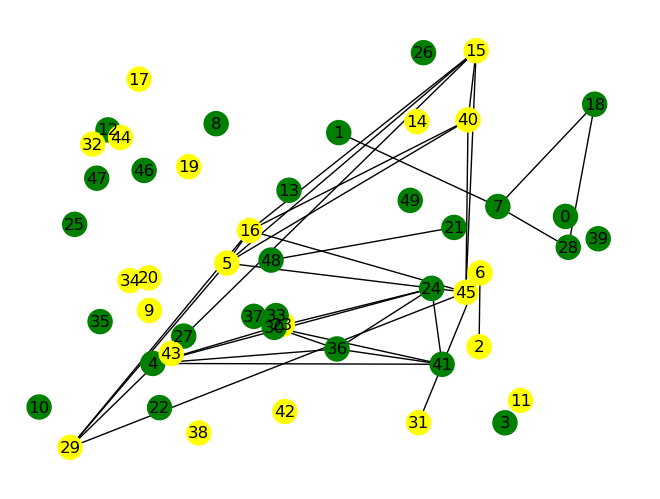

In [34]:
nx.draw_random(graph_same, with_labels=True, node_color=node_colors)
plt.show()

# Edges between same and different categories

In [29]:
from sklearn.metrics.pairwise import cosine_similarity
total=0
graph_same_different.remove_edges_from(list(graph_same_different.edges()))
for i in range(len(sample)):
    print("\nFor node ", i, ":\n")
    n=1
    for j in range(i+1, len(sample)):
        # Access TF-IDF vectors of nodes i and j from the graph
        tfidf_vector_i = graph_same_different.nodes[sample.iloc[i]['ID']]['content']
        tfidf_vector_j = graph_same_different.nodes[sample.iloc[j]['ID']]['content']

        tfidf_vector_i_flat = np.array(tfidf_vector_i).ravel()
        tfidf_vector_j_flat = np.array(tfidf_vector_j).ravel()
            
        # Calculate cosine similarity between TF-IDF vectors of nodes i and j
        similarity_score = cosine_similarity([tfidf_vector_i_flat], [tfidf_vector_j_flat])[0][0]

            
        # Define a threshold to create edges only for pairs with similarity above a certain threshold
        threshold = 0.8
        if similarity_score > threshold:
            print(n, " ", j, " ", similarity_score)
            n=n+1
            total=total+1
            # Add an edge between nodes i and j with the similarity score as an edge attribute
            graph_same_different.add_edge(sample.iloc[i]['ID'], sample.iloc[j]['ID'], weight=similarity_score)
print("Total: ", total)



For node  0 :

1   19   0.8075286548613834

For node  1 :

1   7   0.8302628142183726
2   15   0.8114381555568866

For node  2 :

1   6   0.8167867755954308
2   7   0.8124135500658063

For node  3 :


For node  4 :

1   5   0.8078597667337868
2   24   0.8991561554122307
3   30   0.8160979682508727
4   36   0.8745951606882773
5   41   0.8437570301666453

For node  5 :

1   10   0.8128685592655345
2   15   0.8287769736947356
3   16   0.8634999220553423
4   24   0.8386740701458604
5   26   0.818639811164064
6   29   0.8052113983750905
7   30   0.8585133661699872
8   36   0.8202016854434642
9   40   0.8320640115981061
10   41   0.8403003161845959
11   45   0.8005645562878155

For node  6 :

1   31   0.8045816047696179

For node  7 :

1   18   0.8041082575155281
2   28   0.8121319210390074

For node  8 :


For node  9 :

1   48   0.8089344468818875

For node  10 :

1   15   0.8175718362362671
2   16   0.8413654657344146
3   40   0.8173225917564484
4   45   0.8296725175559354

For node  11 

In [30]:
label_colors = {
    1: 'green',
    0: 'red'
}

# Iterate through nodes and assign colors based on the 'label' attribute
node_colors = []
for node in graph_same_different.nodes():
    if 'label' in graph_same_different.nodes[node]:
        label = graph_same_different.nodes[node]['label']
        color = label_colors.get(label, 'gray')  # Default to gray for unknown labels
        node_colors.append(color)
    else:
        node_colors.append('gray')  # Default to gray for nodes without a 'label' attribute

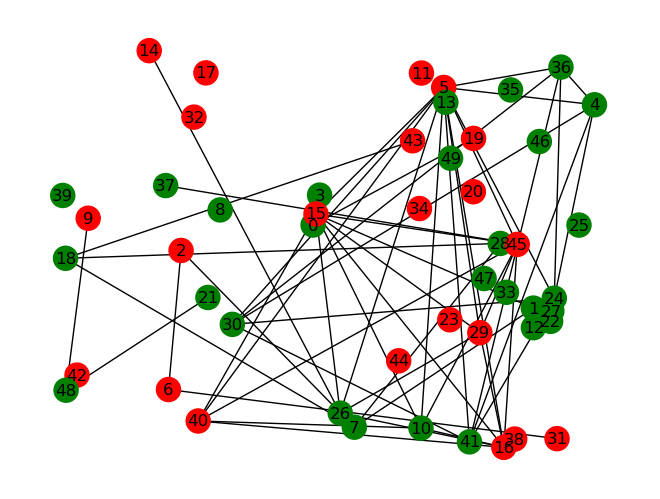

In [31]:
nx.draw_random(graph_same_different, with_labels=True, node_color=node_colors)
plt.show()

# Model Building

In [23]:
import torch